# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## Author : HARSH KUMAR SHARMA

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## Data Preprocessing

In [47]:
df.shape

(9994, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Finding missing values

In [50]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [51]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [52]:
df.duplicated().sum()

17

In [53]:
df.drop_duplicates(subset = None , keep = 'first' , inplace = True)
df.duplicated().sum()

0

In [54]:
df['Postal Code']=df['Postal Code'].astype('object')
df['Quantity']=df['Quantity'].astype('object')

In [55]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   object 
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [56]:
df.corr()

,Sales,Discount,Profit
Sales,1.000000,-0.028311,0.479067
Discount,-0.028311,1.000000,-0.219662
Profit,0.479067,-0.219662,1.000000


<AxesSubplot:>

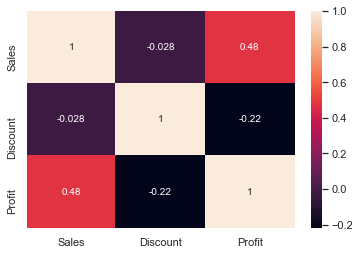

In [57]:
sns.heatmap(df.corr(),annot=True)

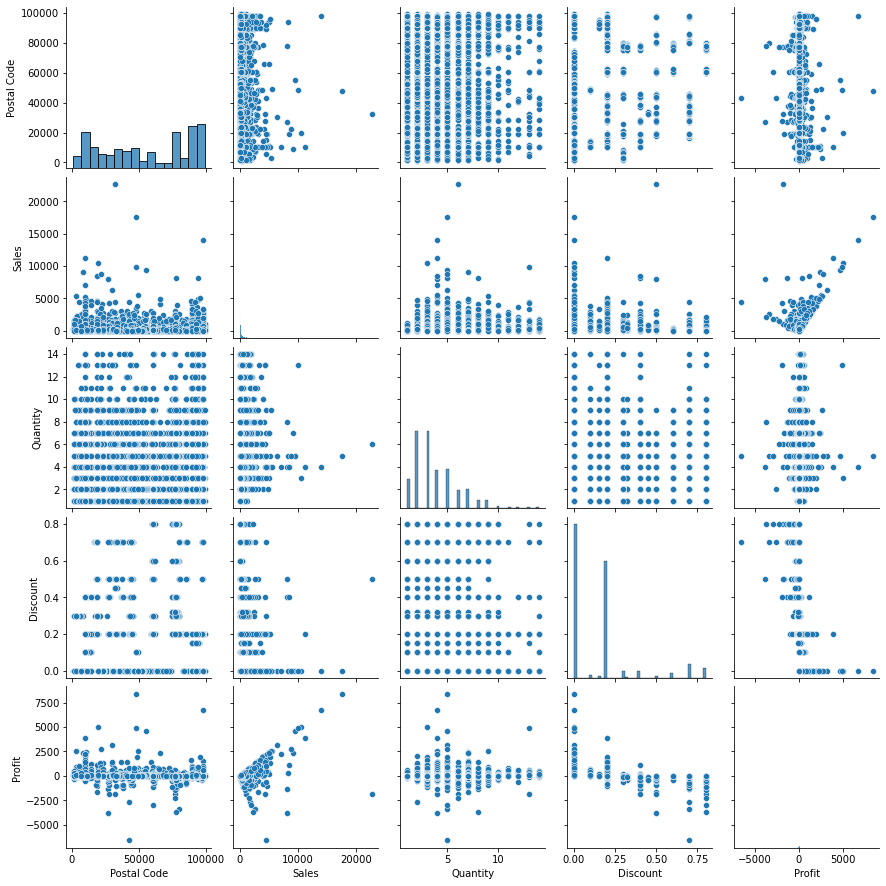

In [19]:
sns.pairplot(data=df)

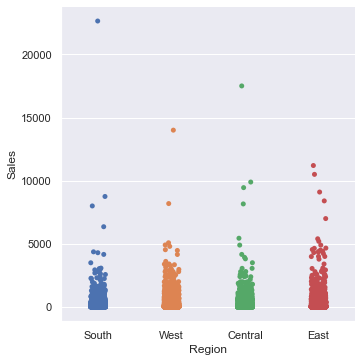

In [58]:
sns.set(style='darkgrid') 
sns.catplot(x='Region', y='Sales', data=df)

In [21]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

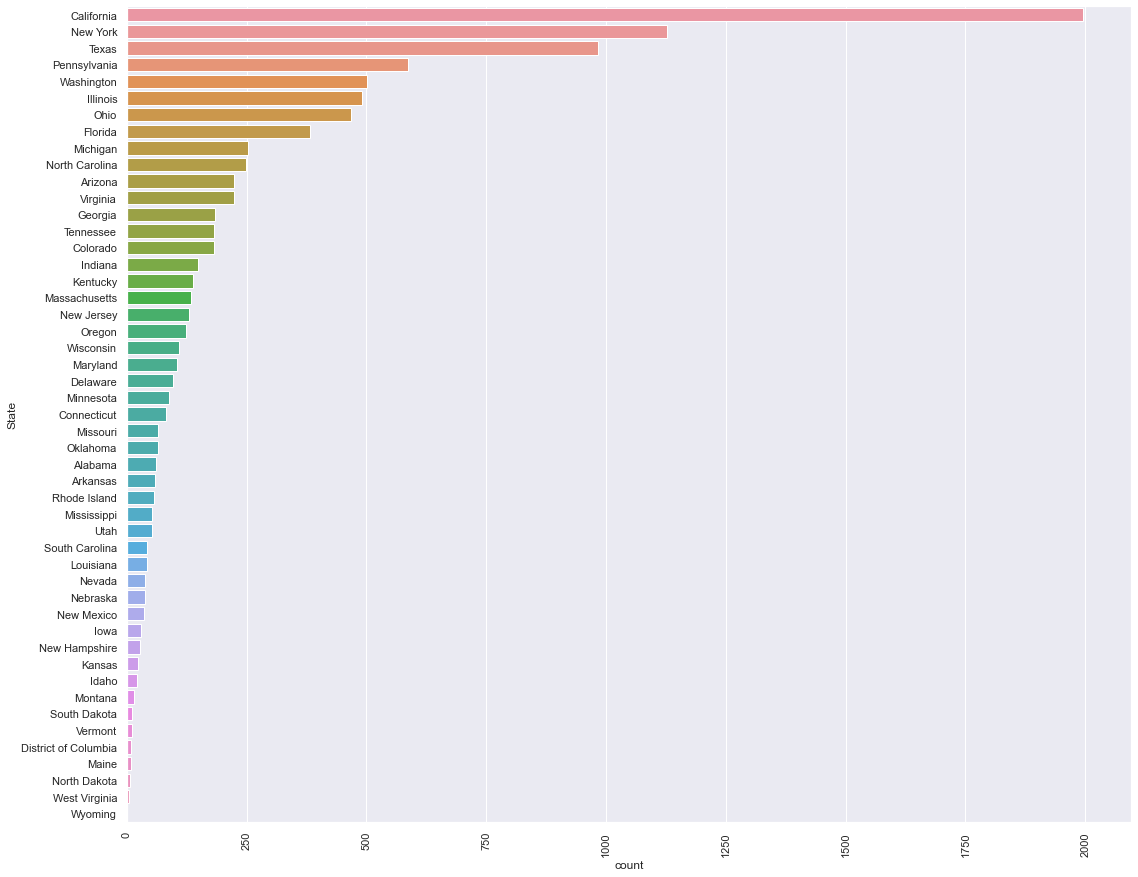

In [22]:
fig=plt.figure(figsize=(18,15)) 
sns.countplot(y='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

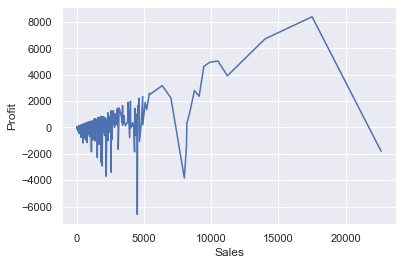

In [33]:
sns.lineplot(data=df,x='Sales',y='Profit')

<AxesSubplot:xlabel='Sales', ylabel='Discount'>

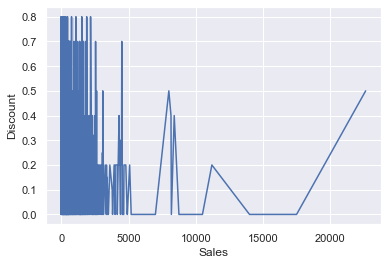

In [35]:
sns.lineplot(data=df,x='Sales',y='Discount')

<AxesSubplot:ylabel='Region'>

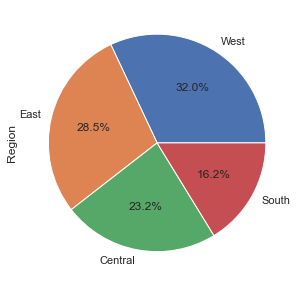

In [59]:
a=df['Region'].value_counts()
b=df['Ship Mode'].value_counts()
c=df['Segment'].value_counts()
d=df['Discount'].value_counts()
plt.figure(figsize=(8,5))
a.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Ship Mode'>

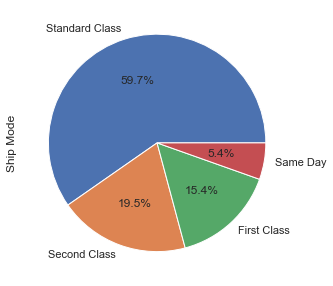

In [60]:
plt.figure(figsize=(8,5))
b.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Segment'>

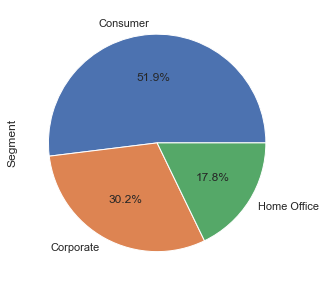

In [61]:
plt.figure(figsize=(8,5))
c.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Discount'>

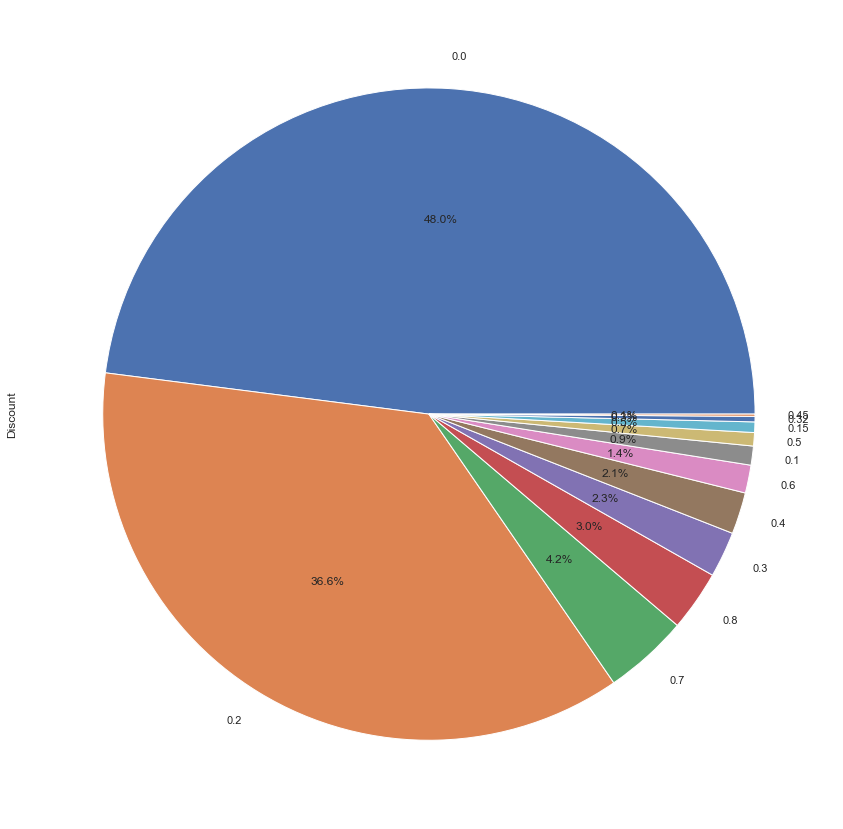

In [62]:
plt.figure(figsize=(18,15))
d.plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='Segment'>

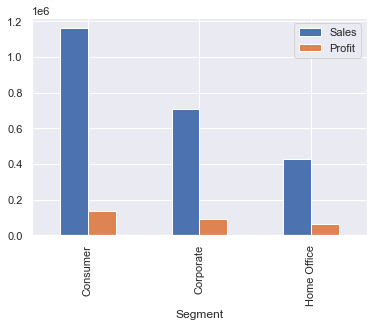

In [63]:
df.groupby('Segment')[['Sales','Profit']].sum().plot.bar()

<AxesSubplot:xlabel='Region', ylabel='Sales'>

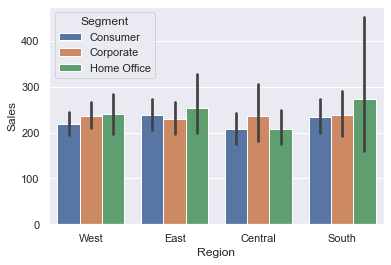

In [64]:
sns.barplot(y='Sales', x='Region',hue='Segment',data=df,order=df['Region'].value_counts().index)